In [1]:
import pandas as pd
import numpy as np

## On veut prédire le niveau de revenus d'un adulte américain s’étant fait recenser.
## On utilise ici le dataset adult.csv

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Pre processing

### Conversion des objets en catégories

In [6]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [7]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
df["fnlwgt"].value_counts()

164190    13
123011    13
203488    13
113364    12
148995    12
          ..
201155     1
127384     1
270522     1
315804     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64

In [9]:
df.sort_values("fnlwgt")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19115,25,?,12285,Some-college,10,Never-married,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
27908,23,Private,13769,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K
26634,46,Local-gov,14878,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K
25156,26,Private,18827,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
13658,25,Private,19214,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,35,Private,1226583,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K
17793,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K
18814,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K
20027,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [10]:
df.replace("?",np.nan,inplace=True)

In [11]:
df["income"]=pd.Categorical(df["income"])

In [12]:
df["marital.status"]=pd.Categorical(df["marital.status"])

In [13]:
df["education"]=pd.Categorical(df["education"])

In [14]:
df["workclass"]=pd.Categorical(df["workclass"])

In [15]:
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
df["occupation"]=pd.Categorical(df["occupation"])

In [17]:
df["relationship"]=pd.Categorical(df["relationship"])

In [18]:
df["race"]=pd.Categorical(df["race"])

In [19]:
df["sex"]=pd.Categorical(df["sex"])

In [20]:
df["native.country"]=pd.Categorical(df["native.country"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      30718 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  31978 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### Analyse des corrélations

#### Corrélations entre le revenu et les variables catégoriques avec le test chi_2

In [22]:
from scipy.stats import chi2_contingency


In [23]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['native.country'])
print(CrosstabResult)


 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


native.country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
income                                                                        
<=50K                 12      82     55        57    70                  68   
>50K                   7      39     20         2    25                   2   

native.country  Ecuador  El-Salvador  England  France  ...  Portugal  \
income                                                 ...             
<=50K                24           97       60      17  ...        33   
>50K                  4            9       30      12  ...         4   

native.country  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
income                                                           
<=50K                   102         9     64      31        15   
>50K                     12         3     16      20         3   

native.country  Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
income                                                     

sex     Female   Male
income               
<=50K     9592  15128
>50K      1179   6662
The P-Value of the ChiSq Test is: 0.0


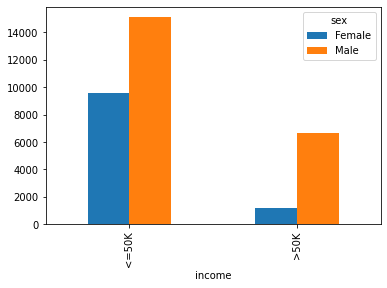

In [24]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['sex'])
print(CrosstabResult)
CrosstabResult.plot.bar()

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


#### La p-value est à 0, il y a corrélation entre sexe et revenu

race    Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
income                                                             
<=50K                  275                 763   2737    246  20699
>50K                    36                 276    387     25   7117
The P-Value of the ChiSq Test is: 2.305960610160958e-70


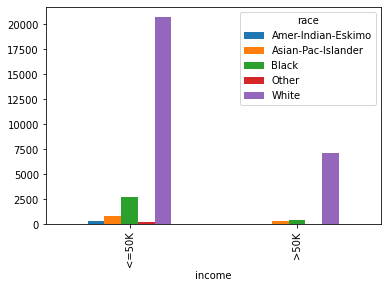

In [25]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['race'])
print(CrosstabResult)
CrosstabResult.plot.bar()

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


#### Il y a corrélation entre race et revenu

In [26]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['relationship'])
print(CrosstabResult)
 

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
income                                                                       
<=50K            7275           7449             944       5001       3228   
>50K             5918            856              37         67        218   

relationship  Wife  
income              
<=50K          823  
>50K           745  
The P-Value of the ChiSq Test is: 0.0


In [27]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['occupation'])
print(CrosstabResult)
 

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

occupation  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
income                                                                  
<=50K               3263             8          3170             2098   
>50K                 507             1           929             1968   

occupation  Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
income                                                              
<=50K                   879               1284               1752   
>50K                    115                 86                250   

occupation  Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
income                                                                        
<=50K                3158              148            2281              438   
>50K                  137                1            1859              211   

occupation  Sales  Tech-support  Transport-moving  
income                                             
<=50K    

In [28]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['marital.status'])
print(CrosstabResult)
 

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


marital.status  Divorced  Married-AF-spouse  Married-civ-spouse  \
income                                                            
<=50K               3980                 13                8284   
>50K                 463                 10                6692   

marital.status  Married-spouse-absent  Never-married  Separated  Widowed  
income                                                                    
<=50K                             384          10192        959      908  
>50K                               34            491         66       85  
The P-Value of the ChiSq Test is: 0.0


In [29]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['education'])
print(CrosstabResult)
 

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
income                                                                    
<=50K       871  1115   400      162      317      606  487         802   
>50K         62    60    33        6       16       40   27         265   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
income                                                                    
<=50K           1021       3134        107     8826      764         51   
>50K             361       2221        306     1675      959          0   

education  Prof-school  Some-college  
income                                
<=50K              153          5904  
>50K               423          1387  
The P-Value of the ChiSq Test is: 0.0


In [30]:
CrosstabResult=pd.crosstab(index=df['income'],columns=df['workclass'])
print(CrosstabResult)
 

 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)


print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

workclass  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
income                                                                   
<=50K              589       1476             7    17733           494   
>50K               371        617             0     4963           622   

workclass  Self-emp-not-inc  State-gov  Without-pay  
income                                               
<=50K                  1817        945           14  
>50K                    724        353            0  
The P-Value of the ChiSq Test is: 1.9338476684848218e-174


#### D'après les résultats des tests chi_2, le revenu semble corrélé à toutes les variables catégoriques

### Corrélations avec les variables numériques

#### On utilise getdummies pour transformer le revenu en variables numériques 

In [31]:
dummies=pd.get_dummies(df["income"])

In [32]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [33]:
df=pd.concat([df,dummies], axis=1)

In [34]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,<=50K,>50K
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,1,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1,0


In [35]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,<=50K,>50K
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.009463,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.335154,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.223329,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.150526,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.229689,0.229689
<=50K,-0.234037,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,1.000000,-1.000000
>50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,-1.000000,1.000000


#### Les revenus semblent être corrélés avec toutes les variables numériques exceptées fnlwgt

#### Comparaison entre âge et revenu

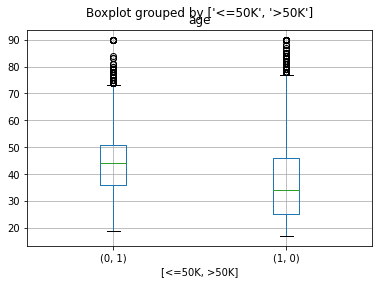

In [36]:
bp = df.boxplot(column=["age"], by=["<=50K", ">50K"])

In [37]:
#df.plot(x="<=50K",y=["education.num"],kind='barh')

In [38]:
income_by_age=df.groupby('income')['age'].mean()


In [39]:
print(income_by_age)

income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64


<AxesSubplot:xlabel='income'>

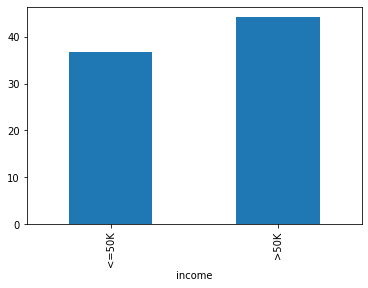

In [40]:
income_by_age.plot(kind="bar")

#### Revenu comparé au capital moyen

<AxesSubplot:ylabel='income'>

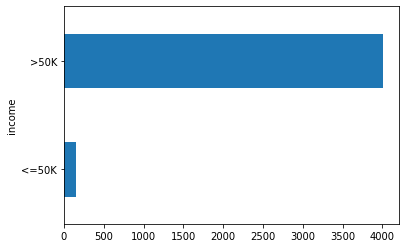

In [41]:
income_by_capital=df.groupby('income')['capital.gain'].mean()
income_by_capital.plot(kind="barh")

#### Supression des valeurs NA

In [42]:
df.dropna(inplace=True)

In [43]:
dummies=pd.get_dummies(df["workclass"])
df=pd.concat([df,dummies], axis=1)

In [44]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,<=50K,>50K,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,1,0,0,0,0,1,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,1,0,0,0,0,1,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,1,0,0,0,0,1,0,0,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,1,0,0,0,0,1,0,0,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,...,1,0,0,0,0,1,0,0,0,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,1,0,0,0,0,1,0,0,0,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,1,0,0,0,1,0,0,0,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,1,0,0,0,0,1,0,0,0,0


### OneHotEncoding des variables catégoriques

In [45]:
dummies=pd.get_dummies(df["education"])
df=pd.concat([df,dummies], axis=1)

In [46]:
dummies=pd.get_dummies(df["marital.status"])
df=pd.concat([df,dummies], axis=1)

In [47]:
dummies=pd.get_dummies(df["occupation"])
df=pd.concat([df,dummies], axis=1)

In [48]:
dummies=pd.get_dummies(df["relationship"])
df=pd.concat([df,dummies], axis=1)

In [49]:
dummies=pd.get_dummies(df["race"])
df=pd.concat([df,dummies], axis=1)

In [50]:
dummies=pd.get_dummies(df["sex"])
df=pd.concat([df,dummies], axis=1)

In [51]:
dummies=pd.get_dummies(df["native.country"])
df=pd.concat([df,dummies], axis=1)

In [52]:
df_encoded=df.copy()

In [53]:
df_encoded

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,0,0,0,0,0,0,1,0,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df_encoded.dropna(inplace=True)

### Normalisation des variables numériques

In [55]:
import pandas as pd
from sklearn import preprocessing

x = df_encoded[["age","education.num","capital.loss","capital.gain","hours.per.week"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled,columns=["age","education.num","capital.loss","capital.gain","hours.per.week"])

In [56]:
df_normalized

,age,education.num,capital.loss,capital.gain,hours.per.week
0,0.890411,0.533333,1.000000,0.0,0.173469
1,0.506849,0.200000,0.895317,0.0,0.397959
2,0.328767,0.600000,0.895317,0.0,0.397959
3,0.232877,0.533333,0.865473,0.0,0.448980
4,0.287671,0.333333,0.865473,0.0,0.397959
...,...,...,...,...,...
30157,0.068493,0.600000,0.000000,0.0,0.397959
30158,0.136986,0.733333,0.000000,0.0,0.377551
30159,0.315068,0.533333,0.000000,0.0,0.397959
30160,0.561644,0.533333,0.000000,0.0,0.397959


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Columns: 116 entries, age to Yugoslavia
dtypes: category(9), int64(6), uint8(101)
memory usage: 4.8 MB


In [58]:
df_encoded.drop(['workclass', 'education','marital.status','occupation','relationship','race','sex'], axis = 1,inplace=True)

In [59]:
df_encoded.drop(['native.country'], axis = 1,inplace=True)

In [60]:
df_encoded.drop(['age','education.num','capital.loss','capital.gain','hours.per.week'], axis = 1,inplace=True)

In [61]:
df_encoded.reset_index( inplace=True)
df_normalized.reset_index( inplace=True)

In [62]:
df_to_train=pd.concat([df_encoded,df_normalized],axis=1)

In [63]:
df_to_train.drop(['income'], axis = 1,inplace=True)

In [64]:
df_to_train.drop(['fnlwgt'], axis = 1,inplace=True)

In [65]:
df_to_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Columns: 108 entries, index to hours.per.week
dtypes: float64(5), int64(2), uint8(101)
memory usage: 4.5 MB


In [66]:
df_to_train.columns

Index(['index', '<=50K', '>50K', 'Federal-gov', 'Local-gov', 'Never-worked',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       ...
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', 'index',
       'age', 'education.num', 'capital.loss', 'capital.gain',
       'hours.per.week'],
      dtype='object', length=108)

In [67]:
from sklearn.svm import SVC

#### Création des features et labels

In [68]:
column_array=df_to_train.columns.to_numpy()

In [69]:
column_array=column_array[ (column_array != 'index') & (column_array != '<=50K') & (column_array != '>50K') ]

In [70]:
column_array

array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
       '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Adm-clerical',
       'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving',
       'Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander',
       'Black', 'Other', 'White', 'Female', 'Male', 'Cambodia', 'Canada',
       'China', 'Columbia', 'Cuba', 'Domin

In [71]:
X=df_to_train[column_array]

In [72]:
y=df_to_train[">50K"]

### Entrainement des modèles de classification et comparaison des scores

In [73]:
from sklearn.model_selection import cross_val_score

#### SVC

In [150]:
clf=SVC()
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X, y, cv=3))


[0.82603939 0.82216033 0.82643724]


[0.82603939 0.82216033 0.82643724]

#### Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(decision_clf, X, y, cv=3))

[0.77779988 0.77978914 0.78197732]


[0.77779988 0.77978914 0.78197732]

#### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(max_depth=2, random_state=0)
print(cross_val_score(random_clf, X, y, cv=3))

[0.75114382 0.75104436 0.75104436]


[0.75114382 0.75104436 0.75104436]

#### KNeighbors

In [153]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(neigh, X, y, cv=3))

[0.80704197 0.80266561 0.81062264]


[0.80704197 0.80266561 0.81062264]

#### MLP Classifier

In [74]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=100)
print(cross_val_score(mlp_clf, X, y, cv=3))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.81629202 0.81698826 0.82076785]


[0.81629202 0.81698826 0.82076785]


### Les modèles SVC et MLP semblent donner les meilleurs résultats

### GridSearchCV SVC

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid_clf = GridSearchCV(svr, parameters)
grid_clf.fit(X, y)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [81]:
grid_clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [82]:
grid_clf.best_score_

0.8345256262967473

#### best_params={'C': 1, 'kernel': 'linear'},best_score=0.8345256262967473

### GridSearchCV MLP

In [84]:
# Create list of hyperparameters 
max_iter = [10, 20]
hidden_layer_sizes = [(8, ), (16, )]
param_grid = {'max_iter': max_iter, 'hidden_layer_sizes': hidden_layer_sizes}

# Use Grid search CV to find best parameters using 4 jobs
mlp = MLPClassifier(random_state=1, max_iter=100)
clf = GridSearchCV(estimator = mlp, param_grid = param_grid, 
           scoring = 'roc_auc', n_jobs = -1)
clf.fit(X, y)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

Best Score: 
0.9008620711824596
Best Estimator: 
MLPClassifier(hidden_layer_sizes=(16,), max_iter=20, random_state=1)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Best Score: 
#### 0.9008620711824596
#### Best Estimator: 
#### MLPClassifier(hidden_layer_sizes=(16,), max_iter=20, random_state=1)

### Le classifier MLP avec ces paramètres est celui qui donne les meilleurs résultats